### Summary:
Bellabeat is a high-tech company that designs health-focused smart products, aiming to empower women with personalized insights into their well-being. By collecting data on physical activity, sleep patterns, stress levels, and reproductive health, Bellabeat enables users to better understand and manage their health habits. This dataset provides a foundation for analyzing user behavior and identifying data-driven opportunities for product development and marketing strategies.

## Ask
### The Business Task:
The Bellabeat marketing analytics team has been tasked with analyzing smart device usage data from non-Bellabeat products. The goal is to identify key user behavior trends that can be applied to Bellabeat’s own product offerings. By understanding how consumers engage with smart health devices, the team aims to generate actionable insights and high-level recommendations to inform Bellabeat’s marketing strategy and improve customer engagement.

## Prepare:
The Fitbit Fitness Tracker Dataset is a public dataset published by Mobius for research and analysis purposes. The data is available on Kaggle and consists of multiple .csv files, each representing different aspects of fitness tracking such as daily activity, sleep, and steps.
Since the dataset is hosted on a reputable platform (Kaggle) and licensed under CC0 (Public Domain), it is considered:

* __Reliable:__ Collected directly from real users via Fitbit devices
* __Original:__ Sourced from consenting participants
* __Comprehensive:__ Covers multiple areas of health behavior
* __Credible:__ Published by a known contributor and publicly cited
* __Privacy:__ No personal identifying information, ensuring privacy compliance
* __Bias:__ Data has no demographical information, this might be bised for this women focused business task

The dataset has completed all necessary licensing and ethical requirements for public use and does not contain any personal identifiers. Therefore, it is free of major bias and meets standards for privacy, licensing, and accessibility.



## Process:
Although the sample size is quite small and could be handled using Excel or a spreadsheet, I have chosen to use Python for cleaning and analyzing the data. This is because I am more comfortable with Python, and it offers a rich set of libraries that significantly enhance the data cleaning and analysis process.

In [3]:
# Imoprt libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Data Import Overview:
For this analysis, the following datasets have been imported to explore and analyze user activity, calories, steps, and sleep patterns:

1. **DailyActivity** – Contains aggregated daily records of physical activity (steps, distance, etc.).
2. **DailyCalories** – Shows calories burned per day.
3. **DailySteps** – Tracks the total steps taken each day.
4. **SleepDay** – Includes information on total minutes asleep and time in bed.
5. **HourlyCalories** – Provides calories burned each hour.
6. **HourlySteps** – Tracks the number of steps taken per hour.

These datasets will help identify trends, patterns, and correlations related to health and fitness behaviors.


In [6]:
# Import csv files
daily_activities = pd.read_csv('dailyActivity.csv')
df_daily_activities = pd.DataFrame(daily_activities)

daily_calories = pd.read_csv('dailyCalories.csv')
df_daily_calories = pd.DataFrame(daily_calories)

daily_steps = pd.read_csv('dailySteps.csv')
df_daily_steps = pd.DataFrame(daily_steps)

sleep_day = pd.read_csv('sleepDay.csv')
df_sleep_day = pd.DataFrame(sleep_day)

hourly_calories = pd.read_csv('hourlyCalories.csv')
df_hourly_calories = pd.DataFrame(hourly_calories)

hourly_steps = pd.read_csv('hourlySteps.csv')
df_hourly_steps = pd.DataFrame(hourly_steps)

In [8]:
# Check the null values
print(df_daily_activities.isna().sum())
print(df_daily_calories.isna().sum())
print(df_daily_steps.isna().sum())
print(df_sleep_day.isna().sum())
print(df_hourly_calories.isna().sum())
print(df_hourly_steps.isna().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64
Id             0
ActivityDay    0
Calories       0
dtype: int64
Id             0
ActivityDay    0
StepTotal      0
dtype: int64
Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64
Id              0
ActivityHour    0
Calories        0
dtype: int64
Id              0
ActivityHour    0
StepTotal       0
dtype: int64


#### Null Value Check:
All selected datasets were checked for missing (null) values using the `.isnull().sum()` function in pandas.

Results show that **no null values are present** in any of the columns of the datasets:

This indicates that the datasets are clean and ready for further analysis without requiring imputation or removal of missing data.


In [11]:
# Check the duplicates
print(df_daily_activities[df_daily_activities.duplicated()])
print(df_daily_calories[df_daily_calories.duplicated()])
print(df_daily_steps[df_daily_steps.duplicated()])
print(df_sleep_day[df_sleep_day.duplicated()])
print(df_hourly_calories[df_hourly_calories.duplicated()])
print(df_hourly_steps[df_hourly_steps.duplicated()])

Empty DataFrame
Columns: [Id, ActivityDate, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories]
Index: []
Empty DataFrame
Columns: [Id, ActivityDay, Calories]
Index: []
Empty DataFrame
Columns: [Id, ActivityDay, StepTotal]
Index: []
             Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
161  4388161847   5/5/2016 12:00:00 AM                  1                 471   
223  4702921684   5/7/2016 12:00:00 AM                  1                 520   
380  8378563200  4/25/2016 12:00:00 AM                  1                 388   

     TotalTimeInBed  
161             495  
223             543  
380             402  
Empty DataFrame
Columns: [Id, ActivityHour, Calories]
Index: []
Empty DataFrame
Columns: [Id, ActivityHour, StepTotal]
Index: []


In [13]:
# Remove duplicates from sleep day dataframe
df_sleep_day.drop_duplicates(inplace = True)

#### Duplicates Handling:
During the cleaning process, **three duplicated rows** were found in the `SleepDay` dataset. These duplicates were likely repeated entries for the same user and date.

The duplicated rows have been **removed** to ensure the accuracy and reliability of the analysis.


#### Data Wrangling:
I will create different DataFrames tailored for specific analyses by performing operations such as grouping, merging, and aggregating the data. This step will help prepare and organize the data for deeper insights and visualization.

In [17]:
# Rename date columns to Date
df_daily_activities.rename(columns = {'ActivityDate': 'Date'}, inplace = True)
df_daily_calories.rename(columns = {'ActivityDay': 'Date'}, inplace = True)
df_daily_steps.rename(columns = {'ActivityDay': 'Date'}, inplace = True)
df_sleep_day.rename(columns = {'SleepDay': 'Date'}, inplace = True)

In [19]:
# Convert the date to datetime format for daily activity dataframe
df_daily_activities['Date'] = pd.to_datetime(df_daily_activities['Date'])
df_daily_activities['Day'] = df_daily_activities['Date'].dt.day_name()
df_daily_activities.insert(2, 'Day', df_daily_activities.pop('Day'))

# Define the order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Day' column to categorical with the correct order
df_daily_activities['Day'] = pd.Categorical(df_daily_activities['Day'], categories=days_order, ordered=True)

# Sort the DataFrame by 'Day'
df_daily_activities = df_daily_activities.sort_values('Day')
df_daily_activities.head()

,Id,Date,Day,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
845,8378563200,2016-05-09,Monday,8382,6.65,6.65,2.092147,1.27,0.66,4.72,0.00,71,13,171,772,3721
112,1844505072,2016-05-02,Monday,0,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0,0,0,1440,1348
336,3977333714,2016-05-02,Monday,16520,11.05,11.05,0.000000,1.54,6.48,3.02,0.00,24,143,176,713,1760
631,6290855005,2016-04-18,Monday,6885,5.21,5.21,0.000000,0.00,0.00,5.19,0.02,0,0,271,1169,2766
831,8378563200,2016-04-25,Monday,12405,9.84,9.84,2.092147,5.05,0.87,3.92,0.00,117,16,141,692,4005


In [21]:
# Convert the date to datetime format for daily activity datafrme
df_sleep_day['Date'] = pd.to_datetime(df_sleep_day['Date'])
df_sleep_day['Day'] = df_sleep_day['Date'].dt.day_name()
df_sleep_day.insert(2, 'Day', df_sleep_day.pop('Day'))

# Define the order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Day' column to categorical with the correct order
df_sleep_day['Day'] = pd.Categorical(df_sleep_day['Day'], categories=days_order, ordered=True)

# Sort the DataFrame by 'Day'
df_sleep_day = df_sleep_day.sort_values('Day')

# Convert the minutes into the hour
df_sleep_day['TotalHourAsleep'] = (df_sleep_day['TotalMinutesAsleep']/60).round(2)
df_sleep_day['TotalHourInBed'] = (df_sleep_day['TotalTimeInBed']/60).round(2)
df_sleep_day.head()

,Id,Date,Day,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHourAsleep,TotalHourInBed
158,4388161847,2016-05-02,Monday,2,368,376,6.13,6.27
206,4702921684,2016-04-18,Monday,1,293,312,4.88,5.20
354,7086361926,2016-05-02,Monday,1,440,459,7.33,7.65
120,4319703577,2016-04-18,Monday,1,515,551,8.58,9.18
212,4702921684,2016-04-25,Monday,1,370,380,6.17,6.33


In [23]:
# Grouping the data from daily actifities datafrme by id
df_activity = df_daily_activities.groupby('Id')[
    ['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
     'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']
].mean().round(2)

# Grouping the data from daily sleep datafrme by id
df_sleep = df_sleep_day.groupby('Id')[['TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']].mean().round(2)

# Merge the both dataframe
df_merged_activity_sleep = pd.merge(df_activity, df_sleep, on = 'Id', how = 'inner')
df_merged_activity_sleep.head()

,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
Id,,,,,,,,,,
1503960366,12116.74,7.81,38.71,19.16,219.94,848.16,1816.42,1.08,360.28,383.20
1644430081,7282.97,5.30,9.57,21.37,178.47,1161.87,2811.30,1.00,294.00,346.00
1844505072,2580.06,1.71,0.13,1.29,115.45,1206.61,1573.48,1.00,652.00,961.00
1927972279,916.13,0.63,1.32,0.77,38.58,1317.42,2172.81,1.60,417.00,437.80
2026352035,5566.87,3.45,0.10,0.26,256.65,689.42,1540.65,1.00,506.18,537.64


##### Step Count Categorization

I categorized the total steps into five different categories based on the guidelines from [Verywell Fit](https://www.verywellfit.com/how-many-steps-per-day-are-enough-3432827). This classification helps in analyzing physical activity levels more meaningfully.

The categories are:
- **Sedentary:** Less than 5,000 steps/day  
- **Low Active:** 5,000 to 7,499 steps/day  
- **Somewhat Active:** 7,500 to 9,999 steps/day  
- **Active:** 10,000 to 12,499 steps/day  
- **Highly Active:** 12,500 or more steps/day

In [26]:
# Create the bins
bins = [0, 5000, 7499, 9999, 12499, float('inf')]
labels = ['Sedentary Lifestyle', 'Low Active', 'Somewhat Active', 'Active', 'Highly Active']

# Incert new column of category of bins labels
df_merged_activity_sleep['Category'] = pd.cut(df_merged_activity_sleep['TotalSteps'], bins = bins, labels = labels, right = True)
df_merged_activity_sleep.insert(2, 'Category', df_merged_activity_sleep.pop('Category'))

# Create new dataframe fo catecory value counts
df_category = df_merged_activity_sleep['Category'].value_counts().reset_index()
df_category.head()

,Category,count
0,Somewhat Active,8
1,Sedentary Lifestyle,7
2,Low Active,4
3,Active,4
4,Highly Active,1


In [28]:
# Grouping the activitis minutes by cateories
df_activity = df_merged_activity_sleep.groupby('Category', 
                                               observed = True)[['VeryActiveMinutes', 
                                                                 'FairlyActiveMinutes', 
                                                                 'LightlyActiveMinutes', 
                                                                 'SedentaryMinutes']].mean().round(2).reset_index()
df_activity

,Category,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,Sedentary Lifestyle,3.80,4.37,110.03,1167.31
1,Low Active,3.70,9.00,238.06,845.85
2,Somewhat Active,32.98,19.66,209.35,774.86
3,Active,27.95,29.26,226.20,861.93
4,Highly Active,85.16,9.58,150.97,1148.00


Despite the `SleepDay` dataset having 23 individuals and the `DailySteps` dataset having 32,  
I am excited to explore the relationship between step count and sleep quality.

In [31]:
# Convert the date into datatime format
df_sleep_day['Date'] = pd.to_datetime(df_sleep_day['Date'])
df_sleep_day['Date'] = df_sleep_day['Date'].dt.strftime('%-m/%-d/%Y')

# Merge the daily setp dataframe and daily sleep dataframe
df_merged_steps_sleep = pd.merge(df_daily_steps, df_sleep_day, on = ['Id', 'Date'], how = 'inner')
df_merged_steps_sleep.head()

,Id,Date,StepTotal,Day,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHourAsleep,TotalHourInBed
0,1503960366,4/12/2016,13162,Tuesday,1,327,346,5.45,5.77
1,1503960366,4/13/2016,10735,Wednesday,2,384,407,6.40,6.78
2,1503960366,4/15/2016,9762,Friday,1,412,442,6.87,7.37
3,1503960366,4/16/2016,12669,Saturday,2,340,367,5.67,6.12
4,1503960366,4/17/2016,9705,Sunday,1,700,712,11.67,11.87


In [33]:
# Converting data format into datatime format and extract hours in a day
df_hourly_calories['ActivityHour'] = pd.to_datetime(df_hourly_calories['ActivityHour'], format = '%m/%d/%Y %I:%M:%S %p')
df_hourly_calories['Hour'] = df_hourly_calories['ActivityHour'].dt.hour
df_hourly_calories.head()

,Id,ActivityHour,Calories,Hour
0,1503960366,2016-04-12 00:00:00,81,0
1,1503960366,2016-04-12 01:00:00,61,1
2,1503960366,2016-04-12 02:00:00,59,2
3,1503960366,2016-04-12 03:00:00,47,3
4,1503960366,2016-04-12 04:00:00,48,4


## Analyze:
In this phase, I will visualize the processed data to uncover hidden patterns, trends, and insights. Data cleaning, wrangling, grouping, and formatting have already been completed in the *Process* phase. Now, I will analyze the data through visualizations to better understand the underlying insights.

#### Day-wise Behavior Comparison
I am creating a 1x3 subplot layout to insert bar charts that compare the day-wise average of steps, calories burned, and sleep duration. These visualizations will help reveal behavioral patterns across different days of the week and provide insights into users' activity and rest habits.


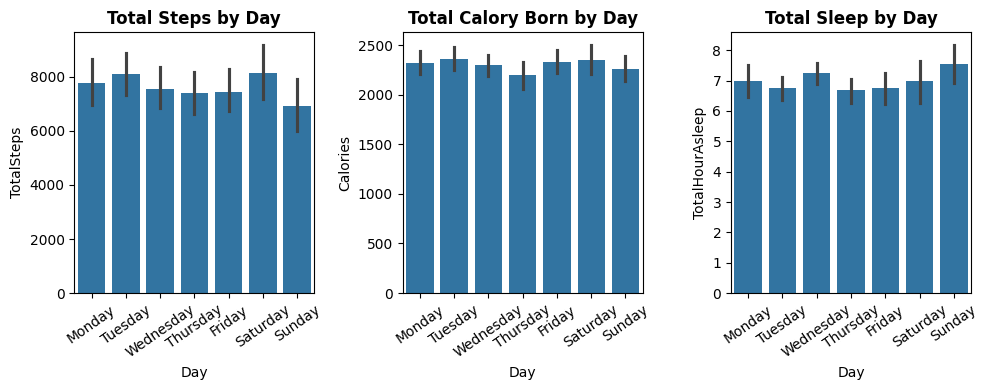

In [37]:
# Create a 2x2 grid of subplots and visualize different bar charts
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

sns.barplot(data = df_daily_activities,
            x ='Day',
            y ='TotalSteps',
            ax = ax[0]
           )
ax[0].set_title('Total Steps by Day', fontweight = 'bold')
ax[0].tick_params(axis='x', rotation=35) 

sns.barplot(data = df_daily_activities,
            x = 'Day',
            y = 'Calories',
            ax = ax[1]
           )
ax[1].set_title('Total Calory Born by Day', fontweight = 'bold')
ax[1].tick_params(axis='x', rotation=35) 

sns.barplot(data = df_sleep_day,
            x ='Day',
            y ='TotalHourAsleep',
            ax = ax[2]
           )
ax[2].set_title('Total Sleep by Day', fontweight = 'bold')
ax[2].tick_params(axis='x', rotation=35) 

plt.tight_layout()
plt.show()

The bar charts indicate that people's step counts are slightly lower on weknds, while sleep duration trens to be slightly higher. However, the fluctuations across the days of the week are not highly volatile. This suggests that the day of the week has minimal impact on daily steps, calories burned, and sleep.

#### Proportion Distribution of Different Lifestyles
I am going to visualize a pie chart to show the distribution of different lifestyles based on the level of activeness determined by the number of steps taken per day.
The categories are defined using the guidelines from Verywell Fit, which helps analyze physical activity levels more meaningfully.

Step Count Categorization:
Sedentary: Less than 5,000 steps/day,
Low Active: 5,000 to 7,499 steps/day,
Somewhat Active: 7,500 to 9,999 steps/day,
Active: 10,000 to 12,499 steps/day. and
Highly Active: 12,500 or more steps/day

This pie chart will provide insights into the overall physical activity patterns of the individuals in the dataset.

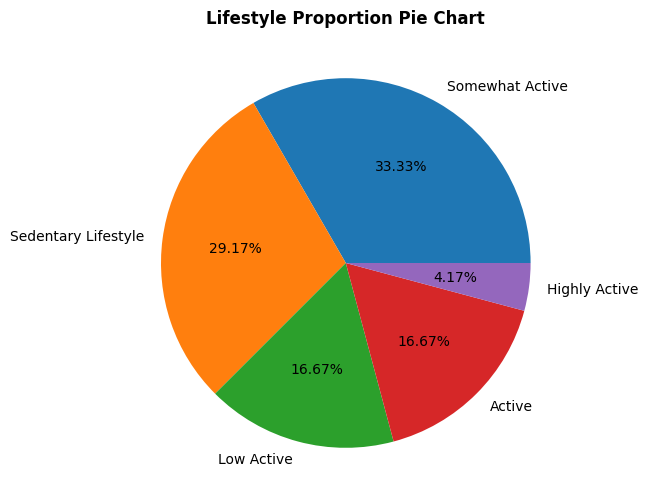

In [41]:
# Create a piechart of proportion of different lifestyles
df_category.plot(kind = 'pie',
                 y = 'count',
                 labels = df_category['Category'],
                 legend = False,
                 autopct = '%1.2f%%',
                 figsize = (8, 6)
                )
plt.title('Lifestyle Proportion Pie Chart', size = 12, fontweight = 'bold')
plt.ylabel('')
plt.show()


The pie chart reveals that a significant proportion of individuals fall under the "Somewhat Active" and "Sedentary" lifestyle categories. In contrast, only a small percentage (approximately 4%) of individuals are classified as "Highly Active".

This indicates that most individuals in the dataset are living relatively passive lifestyles, with limited daily physical activity. The low representation in the highly active category suggests a potential area for health and fitness improvement among the majority of participants.

#### Visualizing Time Spent in Different Activity Intensities by Lifestyle Category
In this plot, I will create four pie charts side-by-side to illustrate how individuals from different lifestyle categories spend their time across various activity intensities:

Sedentary Minutes: Time spent inactive or sitting.

Lightly Active Minutes: Low-intensity activities such as casual walking or household chores.

Fairly Active Minutes: Moderate-intensity activities like brisk walking or light exercise.

Very Active Minutes: High-intensity activities including running or intense workouts.

Each pie chart shows the proportion of time contributed by each lifestyle category (Sedentary, Low Active, Somewhat Active, Active, Highly Active) within that activity intensity. This visualization helps us understand how physical activity levels correspond to the distribution of active and inactive time throughout the day.

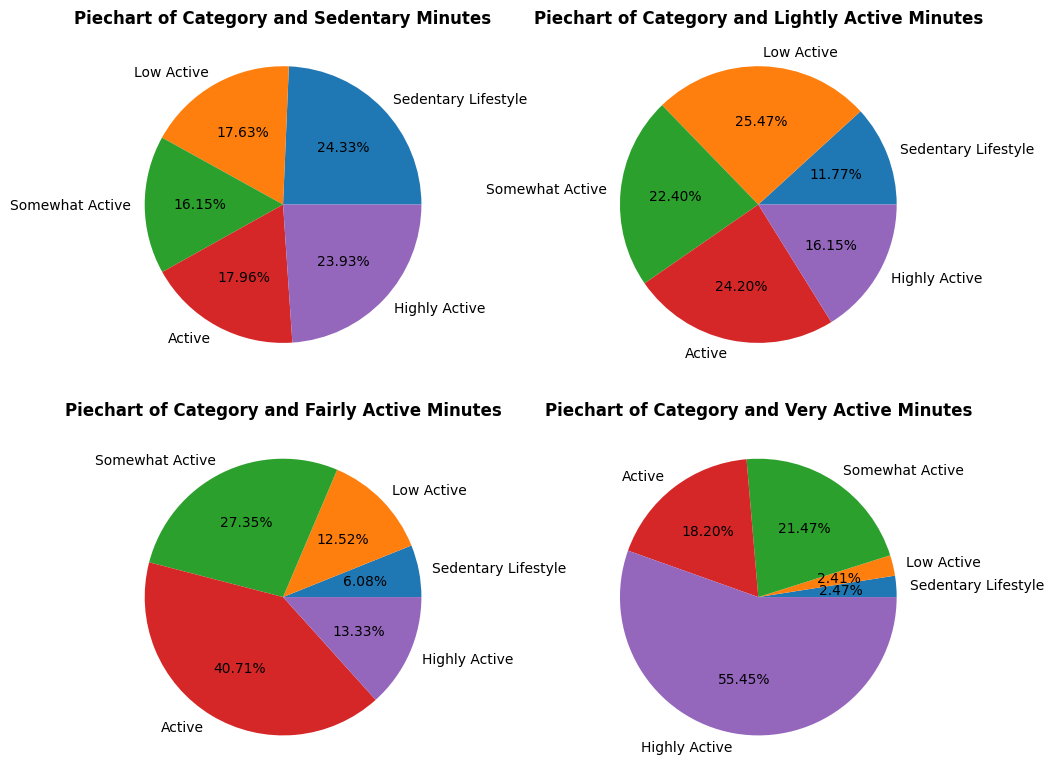

In [45]:
# Create a subplot fo 2x2 and insert different piechart of cateogry distribuion under different activits

# Plot a pichart of Category and Sedentary Minutes
fig, asx = plt.subplots(2,2, figsize = (10,8))
asx[0, 0].pie(df_activity['SedentaryMinutes'],
                 labels = df_activity['Category'],
                 autopct = '%1.2f%%'
                )
asx[0, 0].set_title('Piechart of Category and Sedentary Minutes', fontweight = 'bold')
asx[0, 0].set_ylabel('')

# Plot a pichart of Category and Lightly Active Minutes
asx[0, 1].pie(df_activity['LightlyActiveMinutes'],
                 labels = df_activity['Category'],
                 autopct = '%1.2f%%'
                )
asx[0, 1].set_title('Piechart of Category and Lightly Active Minutes', fontweight = 'bold')
asx[0, 1].set_ylabel('')

# Plot a pichart of Category and Fairly Active Minutes
asx[1, 0].pie(df_activity['FairlyActiveMinutes'],
                 labels = df_activity['Category'],
                 autopct = '%1.2f%%'
                )
asx[1, 0].set_title('Piechart of Category and Fairly Active Minutes', fontweight = 'bold')
asx[1, 0].set_ylabel('')

# Plot a pichart of Category and Very Active Minutes
asx[1, 1].pie(df_activity['VeryActiveMinutes'],
                 labels = df_activity['Category'],
                 autopct = '%1.2f%%'
                )
asx[1, 1].set_title('Piechart of Category and Very Active Minutes', fontweight = 'bold')
asx[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

By comparing these charts, we can observe distinct behavioral differences among lifestyle groups. For example, the Sedentary lifestyle category accounts for the largest proportion of sedentary minutes, while the Highly Active category leads in very active minutes, which suggests that our step-based categorization accurately reflects individuals’ daily activity intensity and time allocation.

#### Regression Plot: Relationship Between Bedtime and Sleep Duration
I am going to create a regression plot to understand the relationship between bedtime and total sleep time. This analysis will help us explore if and how the time individuals go to bed impacts the duration of their sleep.

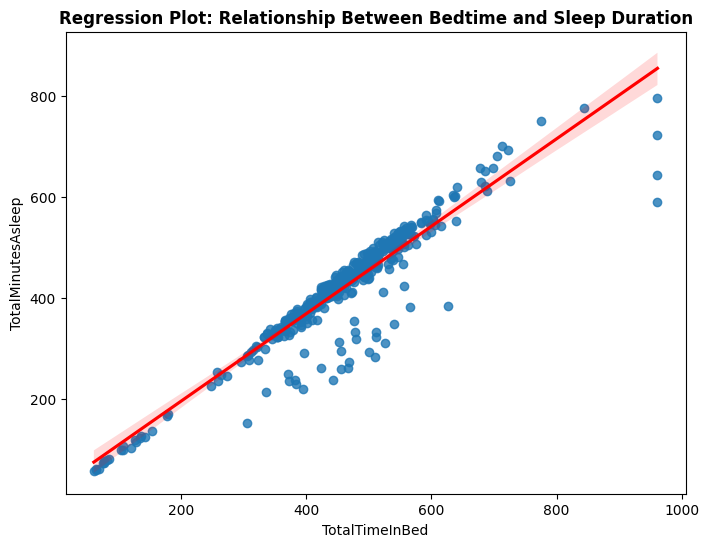

In [49]:
# Creat a regplot of total time in bed and total minutes sleep
plt.figure(figsize = (8,6))
sns.regplot(data = df_sleep_day,
            x = 'TotalTimeInBed',
            y = 'TotalMinutesAsleep',
            line_kws = {'color' : 'red'}
            )
plt.title('Regression Plot: Relationship Between Bedtime and Sleep Duration', fontweight = 'bold')
plt.show()

The regression plot shows an almost perfect positive correlation between bedtime and sleep duration. This suggests that going to bed earlier generally leads to longer sleep duration, highlighting the importance of timely sleep habits for adequate rest.

#### Regression Plot: Relationship Between Total Steps and Sleep Duration
I will create a regression plot to understand the relationship between total step count and sleep quality or duration. This analysis will help reveal if there is any correlation between physical activity levels and how long or well individuals sleep.

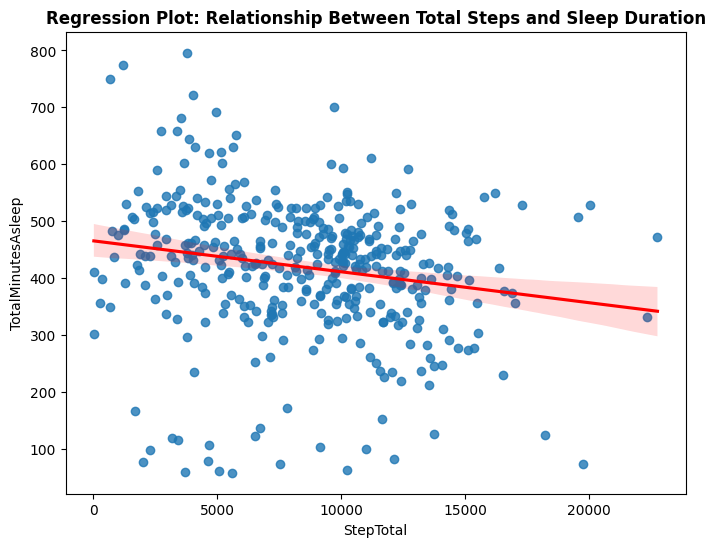

In [53]:
# Creat a regplot of total time in total steps and total minutes sleep
plt.figure(figsize = (8,6))
sns.regplot(data = df_merged_steps_sleep,
            x = 'StepTotal',
            y = 'TotalMinutesAsleep',
            line_kws = {'color' : 'red'}
            )
plt.title('Regression Plot: Relationship Between Total Steps and Sleep Duration', fontweight = 'bold')
plt.show()

I amd very surprised to know the regression plot reveals a slightly negative and highly scattered relationship between total steps and sleep duration. This suggests that individuals who take more steps in a day do not necessarily sleep longer—and in some cases, they may even sleep slightly less. The high degree of scatter indicates that other factors beyond physical activity likely play a significant role in determining sleep duration.

#### Line Plot: Hourly Distribution of Total Calories Burn
I will create a line plot to understand the distribution of calories born on an hourly basis. This helps identify individuals' daily activity patterns and determine when they are most and least active during the day.

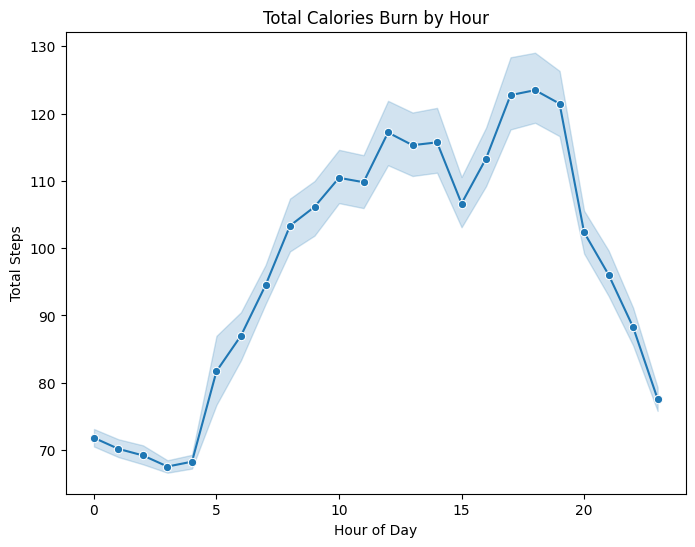

In [57]:
# Creat a line plot of hour of day and calories burn
plt.figure(figsize = (8,6))
sns.lineplot(data = df_hourly_calories, 
             x = 'Hour', 
             y = 'Calories',
             marker = 'o'
            )

plt.title('Total Calories Burn by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Steps')
plt.grid(False)
plt.show()


The above line graphs show that individuals' active time generally starts around 8:00 AM and continues until approximately 7:00 PM. This pattern suggests that most physical activities and calorie-burning occur during daytime hours, likely aligned with work schedules, daily routines, or planned exercises.

## Share:
### Conclusiton and Recommendation:
Through the analysis, several interesting insights were discovered that can be valuable for Bellabeat's strategic planning:

__Predominantly Passive Lifestyles:__
Most individuals in the dataset lead relatively passive lifestyles with limited daily physical activity.
* Opportunity: Bellabeat can target this segment by offering both hardware and software digital health solutions that encourage movement and healthier routines.

__Distinct Behaviors by Lifestyle Category:__
For example, the Sedentary group logs the most sedentary time, while the Highly Active group dominates in active minutes.
* Recommendation: Bellabeat could differentiate its product features and messaging based on lifestyle categories, offering tailored recommendations and goals.

__Sleep Patterns Insights:__
There’s a strong positive correlation between bedtime and sleep duration, but surprisingly a slightly negative and scattered relationship between daily activity and sleep length.
* Suggestion: Bellabeat can explore bedtime tracking and coaching features to promote better sleep. More in-depth research should be conducted to determine which variables most influence quality sleep.

__Time-of-Day Activity Trends:__
People are generally active from 8 AM to 7 PM, coinciding with regular working hours.
* Marketing Insight: Bellabeat can design strategies to extend users' active hours through app reminders, challenges, or personalized goals to combat inactivity outside work hours.

__Data Limitations & Future Work:__
The current dataset lacks demographic diversity and has a small sample size.
* Recommendation: Bellabeat should conduct larger-scale research with more detailed user demographics to gain a deeper understanding of market needs and opportunities.







Thank you for reading!